In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ARCHIVO NUEVA YORK

In [2]:
# Lee el archivo CSV en un DataFrame de Pandas
file_NY = pd.read_csv('/content/drive/MyDrive/Proyecto grupal/todo_en_uno.csv')

# Muestra las primeras filas del DataFrame
file_NY.head()


<ipython-input-2-dfbe546029e7>:2: DtypeWarning: Columns (0,1,4,5,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  file_NY = pd.read_csv('/content/drive/MyDrive/Proyecto grupal/todo_en_uno.csv')


,user_id,name,time,rating,text,pics,resp,gmap_id,resp.time,resp.text
0,113722104692308235141,Alvin Martinez,1.603495e+12,5.0,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,NaN,0x89c25fc9494dce47:0x6d63c807b59a55,NaN,NaN
1,107293441492109320298,Johnnie Jackson,1.620157e+12,1.0,Very dissatisfied I did not get my phone the p...,NaN,NaN,0x89c25fc9494dce47:0x6d63c807b59a55,1.620268e+12,We pride ourselves on providing an awesome exp...
2,100378585801819400296,Manie Blazer,1.597432e+12,5.0,Excellent very well done with professional car...,NaN,NaN,0x89c25fc9494dce47:0x6d63c807b59a55,NaN,NaN
3,114998161153019826512,Fashion Fiinds,1.543774e+12,5.0,Basing my review strictly on the service I rec...,NaN,NaN,0x89c25fc9494dce47:0x6d63c807b59a55,1.543855e+12,Thanks for the awesome review! We work hard t...
4,117178185728422297915,Andres Rieloff,1.597279e+12,1.0,Bad! Disorganized. I'm being totally honest. I...,NaN,NaN,0x89c25fc9494dce47:0x6d63c807b59a55,NaN,NaN


In [3]:
file_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2726324 entries, 0 to 2726323
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   name       object 
 2   time       float64
 3   rating     float64
 4   text       object 
 5   pics       object 
 6   resp       float64
 7   gmap_id    object 
 8   resp.time  float64
 9   resp.text  object 
dtypes: float64(4), object(6)
memory usage: 208.0+ MB


<ipython-input-4-6961e87da7fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulos.index, y=nulos.values, palette='husl')


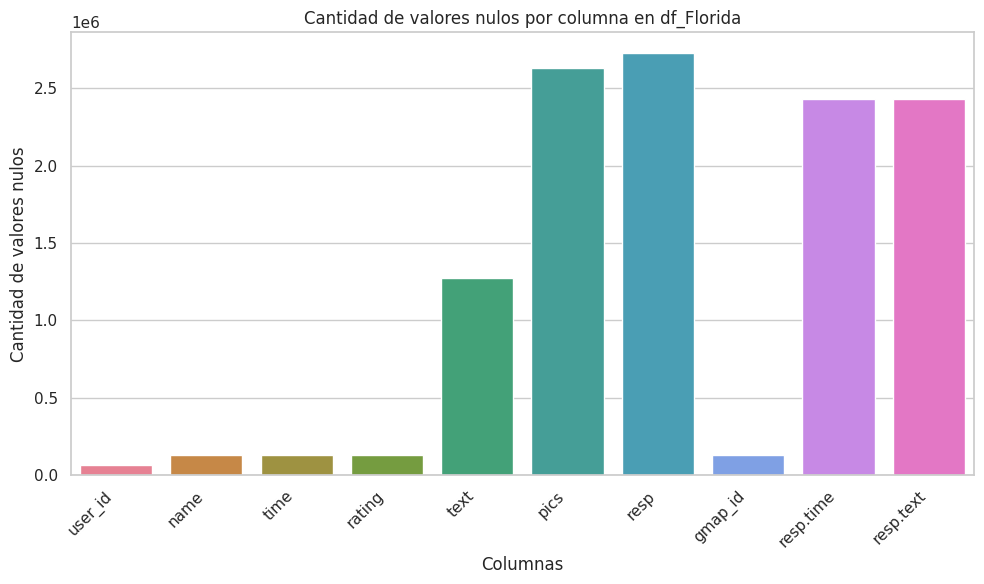

In [4]:
# Calcular el número de valores nulos en cada columna
nulos = file_NY.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='husl')
plt.title('Cantidad de valores nulos por columna en df_Florida')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

contamos en todas las columnas con valores nulos, especialmente en text, pics, resp,  resp.time y en resp.text

In [6]:
# Calcular el número total de filas en el DataFrame
total_filas = len(file_NY)
# Calcular el número de valores nulos en cada columna
nulos = file_NY.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100
porcentaje_nulos

user_id        2.403823
name           4.809553
time           4.809333
rating         4.809333
text          46.793558
pics          96.447011
resp         100.000000
gmap_id        4.809333
resp.time     89.298301
resp.text     89.298301
dtype: float64

Las columnas de resp, pics, resp.time y resp.text se eliminaran pues su gran cantidad de dato nulos no son relevantes y no generan influencia en la toma de descicion

In [7]:
cantidad_filas_repetidas = file_NY.duplicated().sum()
print("Cantidad de filas repetidas:", cantidad_filas_repetidas)

Cantidad de filas repetidas: 235622


Se convierte la columna time en una fecha legible para poder analizar la evolucion de las variables a traz del tiempo

In [8]:
# Convertir la columna 'time' a formato de fecha y hora
file_NY['time'] = pd.to_datetime(file_NY['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
file_NY['fecha'] = file_NY['time'].dt.strftime('%d/%m/%Y')

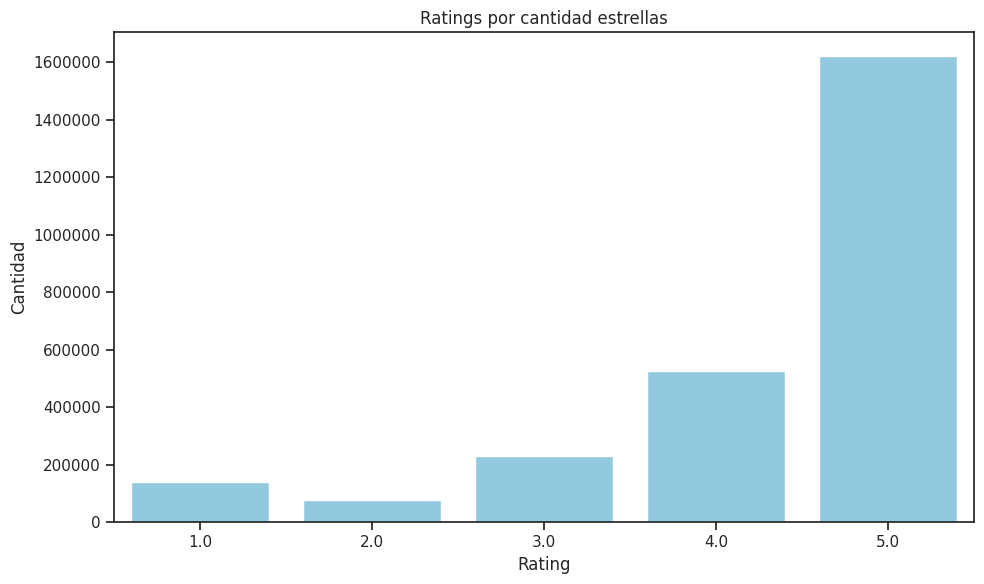

In [9]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=file_NY, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

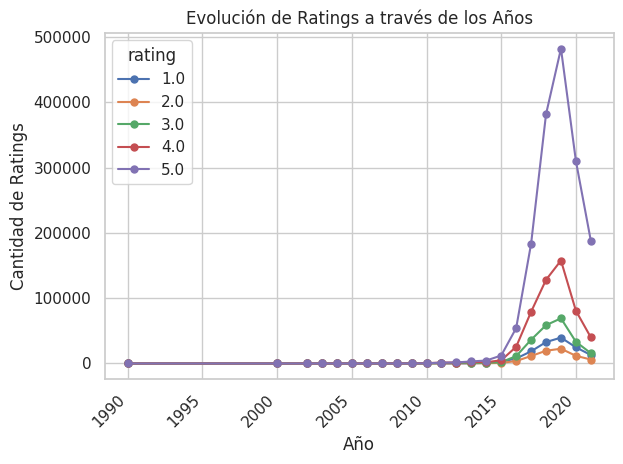

In [10]:
# Extraer el año de la columna 'fecha'
file_NY['year'] = pd.to_datetime(file_NY['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = file_NY.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

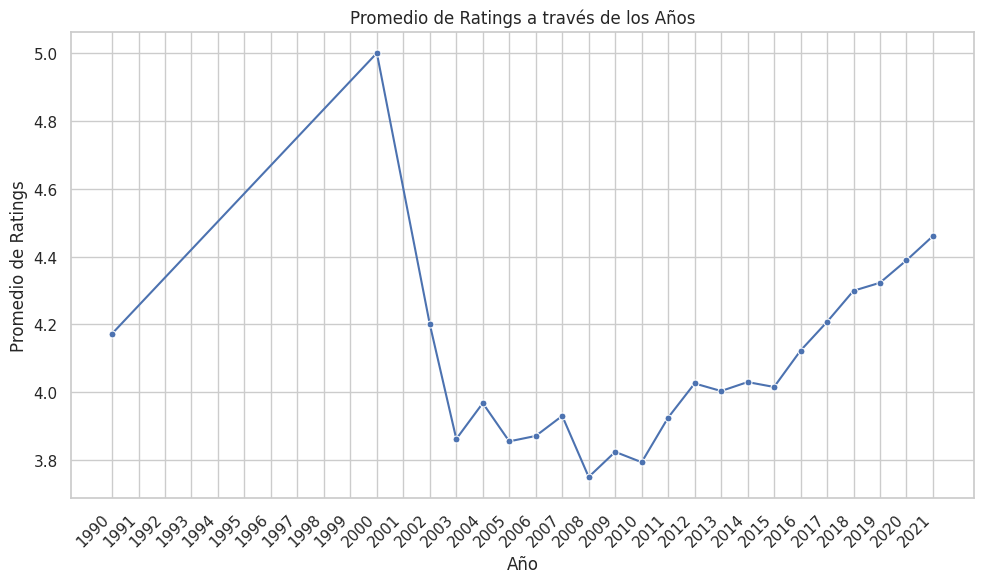

In [11]:
# Extraer el año de la columna 'fecha'
file_NY['year'] = pd.to_datetime(file_NY['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = file_NY.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Extraer el año de la columna 'fecha'
file_NY['year'] = pd.to_datetime(file_NY['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = file_NY.groupby('year').size()
# Mostrar el resultado
print(reviews_per_year)

year
1990.0        29
2000.0         1
2002.0        20
2003.0        29
2004.0        62
2005.0       131
2006.0       155
2007.0       143
2008.0       196
2009.0       250
2010.0      1341
2011.0      3589
2012.0      4120
2013.0      7645
2014.0      8760
2015.0     22806
2016.0    102297
2017.0    328955
2018.0    620670
2019.0    771085
2020.0    460465
2021.0    262457
dtype: int64


ARCHIVO WASHINGTON

In [15]:
# Lee el archivo CSV en un DataFrame de Pandas
file_WS = pd.read_csv('/content/drive/MyDrive/Proyecto grupal/todo_washington.csv')

# Muestra las primeras filas del DataFrame
file_WS.head()

<ipython-input-15-30663d9a8463>:2: DtypeWarning: Columns (0,1,4,5,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  file_WS = pd.read_csv('/content/drive/MyDrive/Proyecto grupal/todo_washington.csv')


,user_id,name,time,rating,text,pics,resp,gmap_id,resp.time,resp.text
0,103093043835388050629,Casper Steele,1.626907e+12,2.0,Drivers say security has bathroom key. Securit...,NaN,NaN,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,NaN,NaN
1,111014066796803341223,Judy Maes,1.613028e+12,5.0,It's a CTRAN transit center with schedules to ...,NaN,NaN,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,NaN,NaN
2,111724423355988809570,Daniel Hernandez,1.536711e+12,5.0,Neat little Transit Center with lots of schedu...,NaN,NaN,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,NaN,NaN
3,115331094085411087904,Lumi Nosa,1.484360e+12,5.0,Very helpful. Thanks,NaN,NaN,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,NaN,NaN
4,106906383883851362879,James Conright,1.500644e+12,1.0,They don't sell tacos.,NaN,NaN,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,NaN,NaN


<ipython-input-16-8cadfb539522>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nulos.index, y=nulos.values, palette='husl')


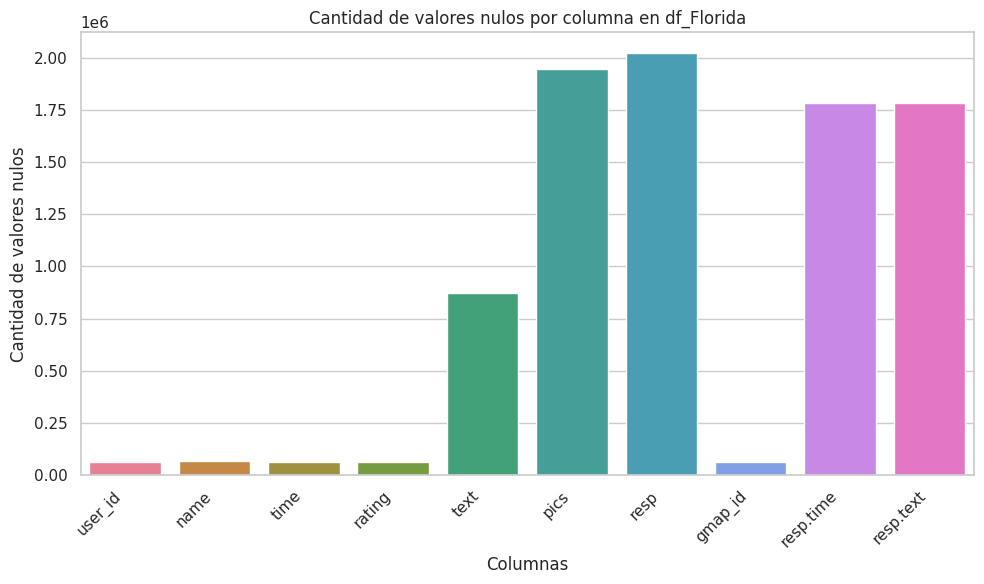

In [16]:
# Calcular el número de valores nulos en cada columna
nulos = file_WS.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='husl')
plt.title('Cantidad de valores nulos por columna en df_Florida')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Calcular el número total de filas en el DataFrame
total_filas = len(file_WS)
# Calcular el número de valores nulos en cada columna
nulos = file_WS.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100
porcentaje_nulos


user_id        3.243064
name           3.248804
time           3.246281
rating         3.246281
text          43.195113
pics          96.295536
resp         100.000000
gmap_id        3.246281
resp.time     88.271605
resp.text     88.271605
dtype: float64

In [19]:
cantidad_filas_repetidas = file_WS.duplicated().sum()
print("Cantidad de filas repetidas:", cantidad_filas_repetidas)

Cantidad de filas repetidas: 114346


In [26]:
# Convertir la columna 'time' a formato de fecha y hora
file_WS['time'] = pd.to_datetime(file_WS['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
file_WS['fecha'] = file_WS['time'].dt.strftime('%d/%m/%Y')

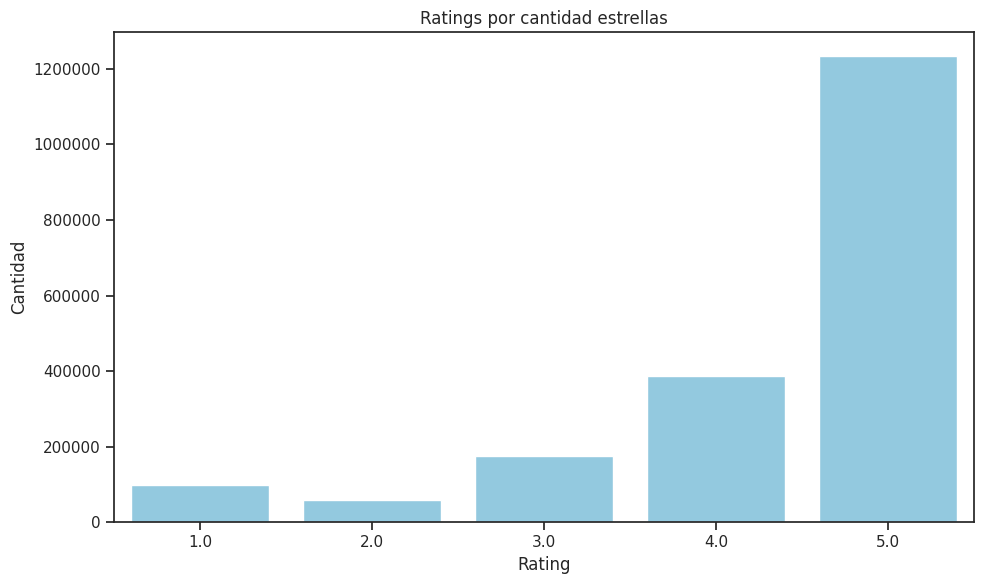

In [22]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=file_WS, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

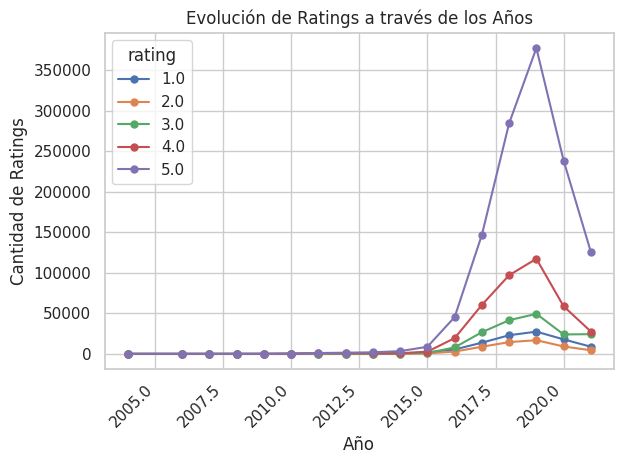

In [27]:
# Extraer el año de la columna 'fecha'
file_WS['year'] = pd.to_datetime(file_WS['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = file_WS.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

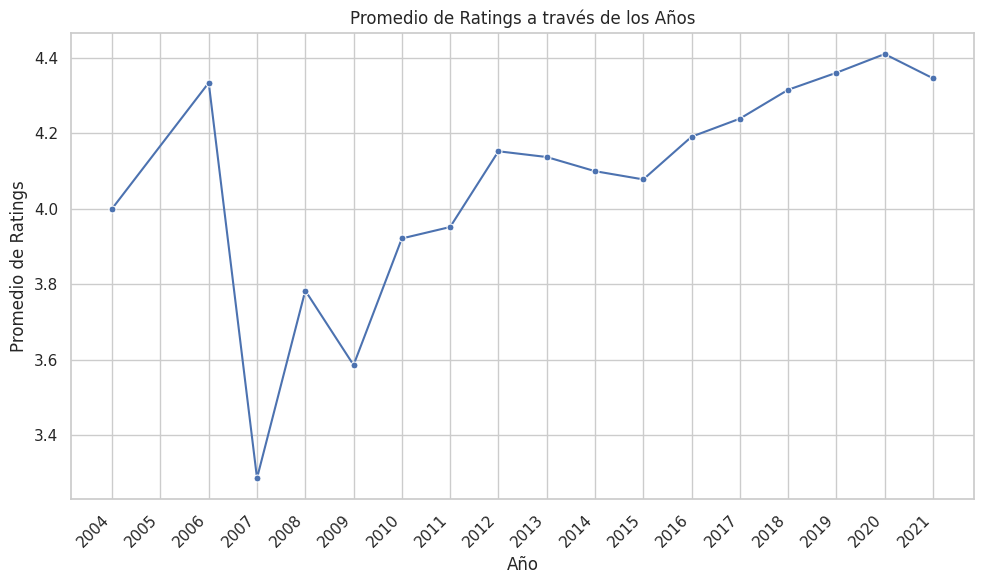

In [28]:
# Extraer el año de la columna 'fecha'
file_WS['year'] = pd.to_datetime(file_WS['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = file_WS.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Extraer el año de la columna 'fecha'
file_WS['year'] = pd.to_datetime(file_WS['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = file_WS.groupby('year').size()
# Mostrar el resultado
print(reviews_per_year)

year
2004.0         1
2006.0         3
2007.0        14
2008.0        46
2009.0        82
2010.0       707
2011.0      2516
2012.0      2833
2013.0      3405
2014.0      5390
2015.0     14956
2016.0     81098
2017.0    256517
2018.0    460445
2019.0    588096
2020.0    348211
2021.0    190884
dtype: int64
